✅ Wczytano dane: (7271677, 6)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7271677 entries, 0 to 7271676
Data columns (total 6 columns):
 #   Column     Dtype  
---  ------     -----  
 0   Timestamp  float64
 1   Open       float64
 2   High       float64
 3   Low        float64
 4   Close      float64
 5   Volume     float64
dtypes: float64(6)
memory usage: 332.9 MB
None


,Timestamp,Open,High,Low,Close,Volume
count,7271677,7.271677e+06,7.271677e+06,7.271677e+06,7.271677e+06,7.271677e+06
mean,2018-11-30 08:11:25.127478272,2.076769e+04,2.077515e+04,2.076002e+04,2.076769e+04,5.148267e+00
min,2012-01-01 10:01:00,3.800000e+00,3.800000e+00,3.800000e+00,3.800000e+00,0.000000e+00
25%,2015-06-16 20:40:00,4.405900e+02,4.408000e+02,4.403400e+02,4.405700e+02,1.906801e-02
50%,2018-11-30 07:19:00,7.196060e+03,7.200000e+03,7.192000e+03,7.196180e+03,4.463022e-01
75%,2022-05-15 17:58:00,3.024400e+04,3.025100e+04,3.023700e+04,3.024400e+04,2.908846e+00
max,2025-10-29 23:57:00,1.262020e+05,1.262720e+05,1.261580e+05,1.262020e+05,5.853852e+03
std,NaN,2.938729e+04,2.939520e+04,2.937924e+04,2.938729e+04,2.213298e+01


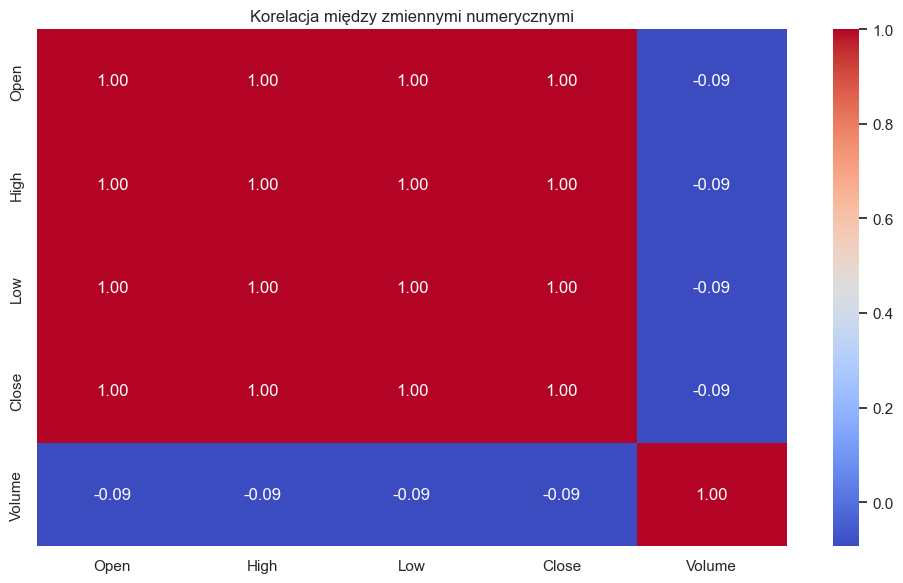

D:\ProjektyPython\ASI\BTC_project\venv\Lib\site-packages\pandas\core\nanops.py:1016: RuntimeWarning: invalid value encountered in subtract
  sqr = _ensure_numeric((avg - values) ** 2)


📊 Histogramy zapisane w katalogu 'docs/'


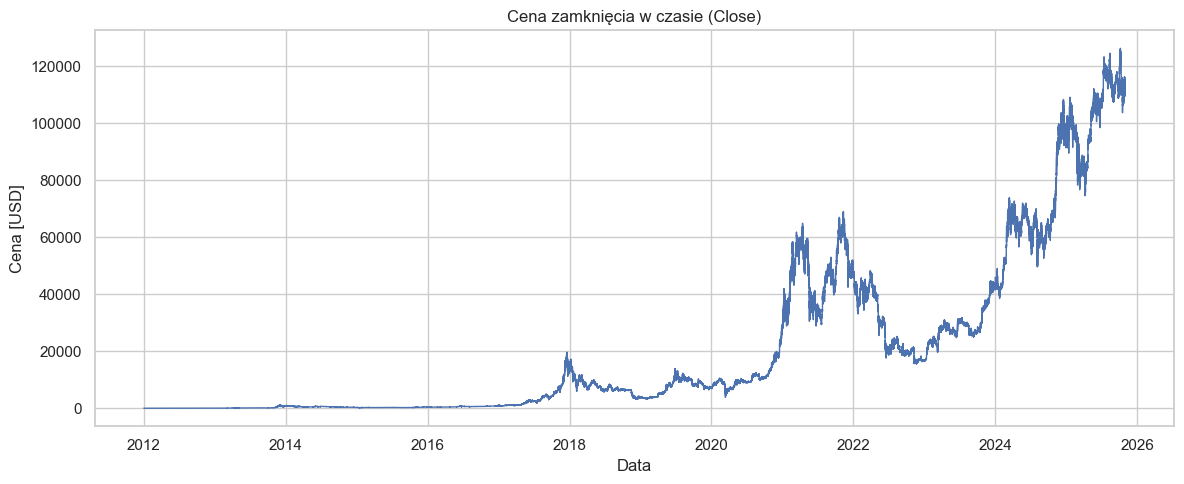

📈 Wykres trendu ceny zapisany jako 'docs/close_trend.png'


In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import zipfile
from io import BytesIO
import os

sns.set(style="whitegrid")

zip_path = "../data/raw/btc-price-history.zip"

with zipfile.ZipFile(zip_path, 'r') as z:
    csv_files = [name for name in z.namelist() if name.endswith(".csv")]
    if not csv_files:
        raise FileNotFoundError("W archiwum ZIP nie znaleziono żadnego pliku .csv")
    
    with z.open(csv_files[0]) as f:
        df = pd.read_csv(f)

print("Wczytano dane:", df.shape)
print(df.info())

if "Timestamp" in df.columns:
    try:
        df["Timestamp"] = pd.to_datetime(df["Timestamp"], unit="s", errors="coerce")
    except:
        df["Timestamp"] = pd.to_datetime(df["Timestamp"], errors="coerce")

display(df.describe(include="all"))

os.makedirs("docs", exist_ok=True)


# Korelacja zmiennych numerycznych
plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Korelacja między zmiennymi numerycznymi")
plt.tight_layout()
plt.savefig("docs/heatmap_correlation.png")
plt.show()

# Histogramy rozkładów dla kolumn numerycznych
for col in df.select_dtypes(include="number").columns:
    plt.figure(figsize=(8, 5))
    sns.histplot(df[col], kde=True, log_scale=(True if df[col].max() > 1000 else False))
    plt.title(f"Rozkład {col}")
    plt.tight_layout()
    plt.savefig(f"docs/hist_{col}.png")
    plt.close()

print("Histogramy zapisane w katalogu 'docs/'")

# Trend ceny w czasie
if "Timestamp" in df.columns and "Close" in df.columns:
    plt.figure(figsize=(12, 5))
    plt.plot(df["Timestamp"], df["Close"], linewidth=1)
    plt.title("Cena zamknięcia w czasie (Close)")
    plt.xlabel("Data")
    plt.ylabel("Cena [USD]")
    plt.tight_layout()
    plt.savefig("docs/close_trend.png")
    plt.show()
    print("Wykres trendu ceny zapisany jako 'docs/close_trend.png'")
else:
    print("Brak kolumn 'Timestamp' lub 'Close' — pominięto wykres trendu.")
